## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 2*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


Invertir y binarizar la imagen fingerprint.jpeg a continuación. Luego, aplicar transformaciones morfológicas adecuadas para remover y restaurar la imagen.



#### *Importar librerías*

Como primer paso, se importan las librerias


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io, filters, util
from skimage.morphology import binary_opening, binary_closing, binary_dilation, binary_erosion
from skimage.morphology import skeletonize, binary_dilation, label

In [64]:
# Cargar imagen
image_path = 'img/fingerprint.jpeg'
image = io.imread(image_path, as_gray=True)

In [65]:
# Filtro Gaussiano para suavizar la imagen
smoothed_image = filters.gaussian(image, sigma=1)

In [66]:
# Se binariza la imagen usando el método de Otsu
thresh = filters.threshold_otsu(smoothed_image)
binary_image = smoothed_image > thresh


In [67]:
#Se invierte la imagen binarizada
inverted_image = util.invert(binary_image)


In [68]:
# Se limpiar la imagen binarizada con operaciones morfológicas

selem = morphology.disk(2)

# Se usa remove_small_objects para eliminar los objetos pequeños
cleaned_image = morphology.remove_small_objects(inverted_image, min_size=64)

# Se aplica opening para eliminar el ruido
opened_image = binary_opening(cleaned_image, selem)

# Se aplica closing para cerrar los huecos
closed_image = binary_closing(opened_image, selem)

# Se aplica dilation para cerrar los huecos
dilated_image = binary_dilation(opened_image, selem)

# Se aplica erosion para eliminar los detalles finos
eroded_image = binary_erosion(dilated_image, selem)

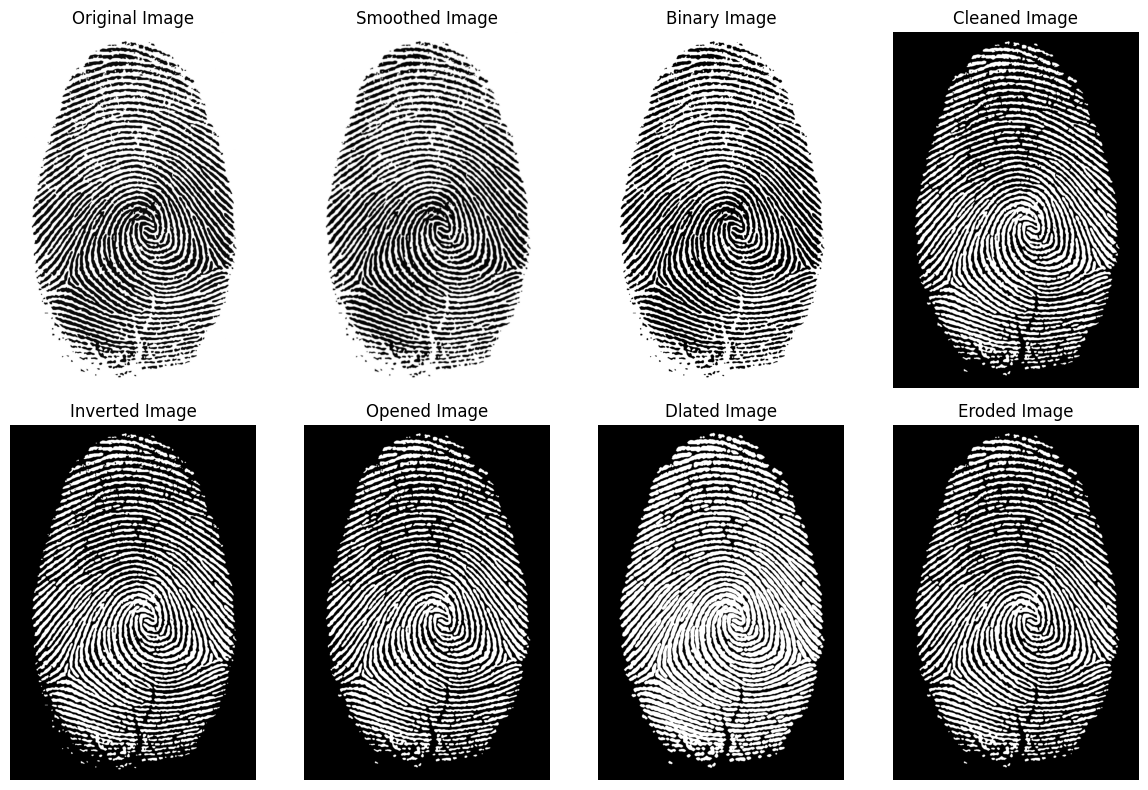

In [69]:
# Visualizar la imagen en diferentes pasos del procesamiento
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(smoothed_image, cmap='gray')
ax[1].set_title('Smoothed Image')
ax[1].axis('off')

ax[2].imshow(binary_image, cmap='gray')
ax[2].set_title('Binary Image')
ax[2].axis('off')

ax[3].imshow(cleaned_image, cmap='gray')
ax[3].set_title('Cleaned Image')
ax[3].axis('off')

ax[4].imshow(inverted_image, cmap='gray')
ax[4].set_title('Inverted Image')
ax[4].axis('off')

ax[5].imshow(opened_image, cmap='gray')
ax[5].set_title('Opened Image')
ax[5].axis('off')

ax[6].imshow(dilated_image, cmap='gray')
ax[6].set_title('Dlated Image')
ax[6].axis('off')

ax[7].imshow(eroded_image, cmap='gray')
ax[7].set_title('Eroded Image')
ax[7].axis('off')



plt.tight_layout()
plt.show()

In [70]:
# Como la parte de arriba es la que tiene mas lineas discontinuas, se aplica un opening para eliminarlas
h, w = image.shape
top_part = closed_image[:int(h*0.2)]  
top_part_closed = morphology.binary_closing(top_part, morphology.disk(5))


(-0.5, 999.5, 287.5, -0.5)

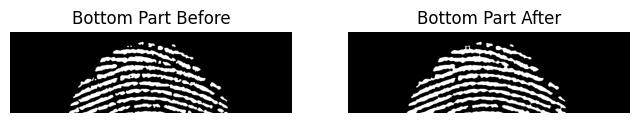

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(top_part, cmap='gray')
ax[0].set_title('Bottom Part Before')
ax[0].axis('off')

ax[1].imshow(top_part_closed, cmap='gray')
ax[1].set_title('Bottom Part After')
ax[1].axis('off')

In [72]:
closed_image[:int(h*0.2)] = top_part_closed

In [73]:
# Como la parte de abajo es la que tiene mas lineas puntos, se le aplica closing para eliminarlas
bottom_part = closed_image[int(h*0.8):]
bottom_part_closed = morphology.binary_closing(bottom_part, morphology.disk(2))


(-0.5, 999.5, 288.5, -0.5)

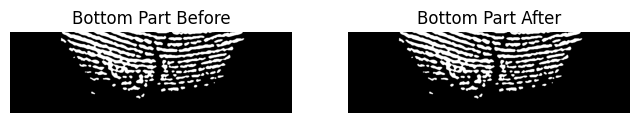

In [74]:
# Visualizar la parte inferior antes y después del procesamiento
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(bottom_part, cmap='gray')
ax[0].set_title('Bottom Part Before')
ax[0].axis('off')

ax[1].imshow(bottom_part_closed, cmap='gray')
ax[1].set_title('Bottom Part After')
ax[1].axis('off')

In [75]:
closed_image[int(h*0.8):] = bottom_part_closed


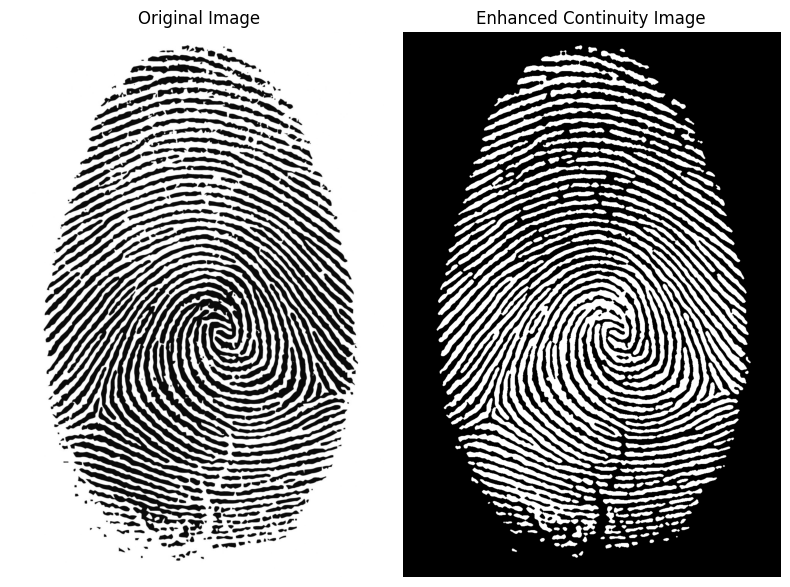

In [76]:
# Resultado
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Enhanced Continuity Image')
plt.axis('off')
plt.tight_layout()
plt.show()


In [77]:
# Esqueletización de la imagen
skeleton = skeletonize(closed_image)

In [78]:
# Dilatación de la imagen esqueletizada
dilated_skeleton = binary_dilation(skeleton, morphology.disk(4))

In [79]:
# Se cplica gaussian smothing
smoothed_skeleton = filters.gaussian(dilated_skeleton, sigma=0.5)


In [80]:
# Se convierte la imagen esqueletizada a una imagen binaria
final_image = smoothed_skeleton > 0.5

In [93]:
# Closing para cerrar los huecos
closed_skeleton = binary_closing(final_image, morphology.disk(3))

# Dilation para cerrar los huecos
dilated_skeleton = binary_dilation(closed_skeleton, morphology.disk(2))


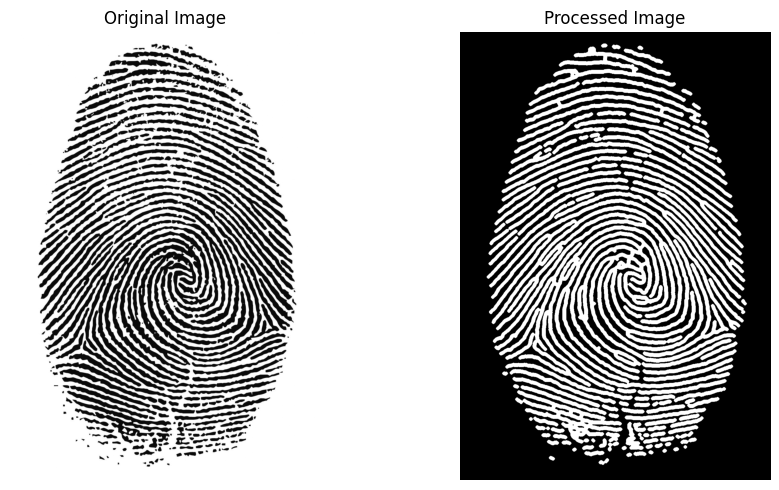

In [94]:
# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(dilated_skeleton, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()